In [39]:
import pandas as pd
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.ticker as ticker

import math

In [23]:
graph_names=["4039_dense_graph","45100_sparse_graph","facebook"]

columns=[str(x)+"_time" for x in range(1,21)]

data=pd.DataFrame(
    columns=["name"]+columns
)

for graph in graph_names:
    row = pd.read_csv('results/'+graph+'.txt', sep=" ", header=None)
    row.columns=columns
    row["name"]=graph
    
    data=pd.concat([data,row])
    
data.reset_index(inplace=True,drop=True)

data

,name,1_time,2_time,3_time,4_time,5_time,6_time,7_time,8_time,9_time,...,11_time,12_time,13_time,14_time,15_time,16_time,17_time,18_time,19_time,20_time
0,4039_dense_graph,62069,31721,21951,17352,18374,16169,15409,14881,14883,...,15040,15023,15137,14969,15062,15017,15074,14903,14878,15034
1,45100_sparse_graph,485,274,198,170,154,145,124,124,136,...,128,131,130,133,130,130,130,134,142,129
2,facebook,69,36,34,28,33,30,20,28,26,...,25,26,23,23,21,20,20,20,19,21


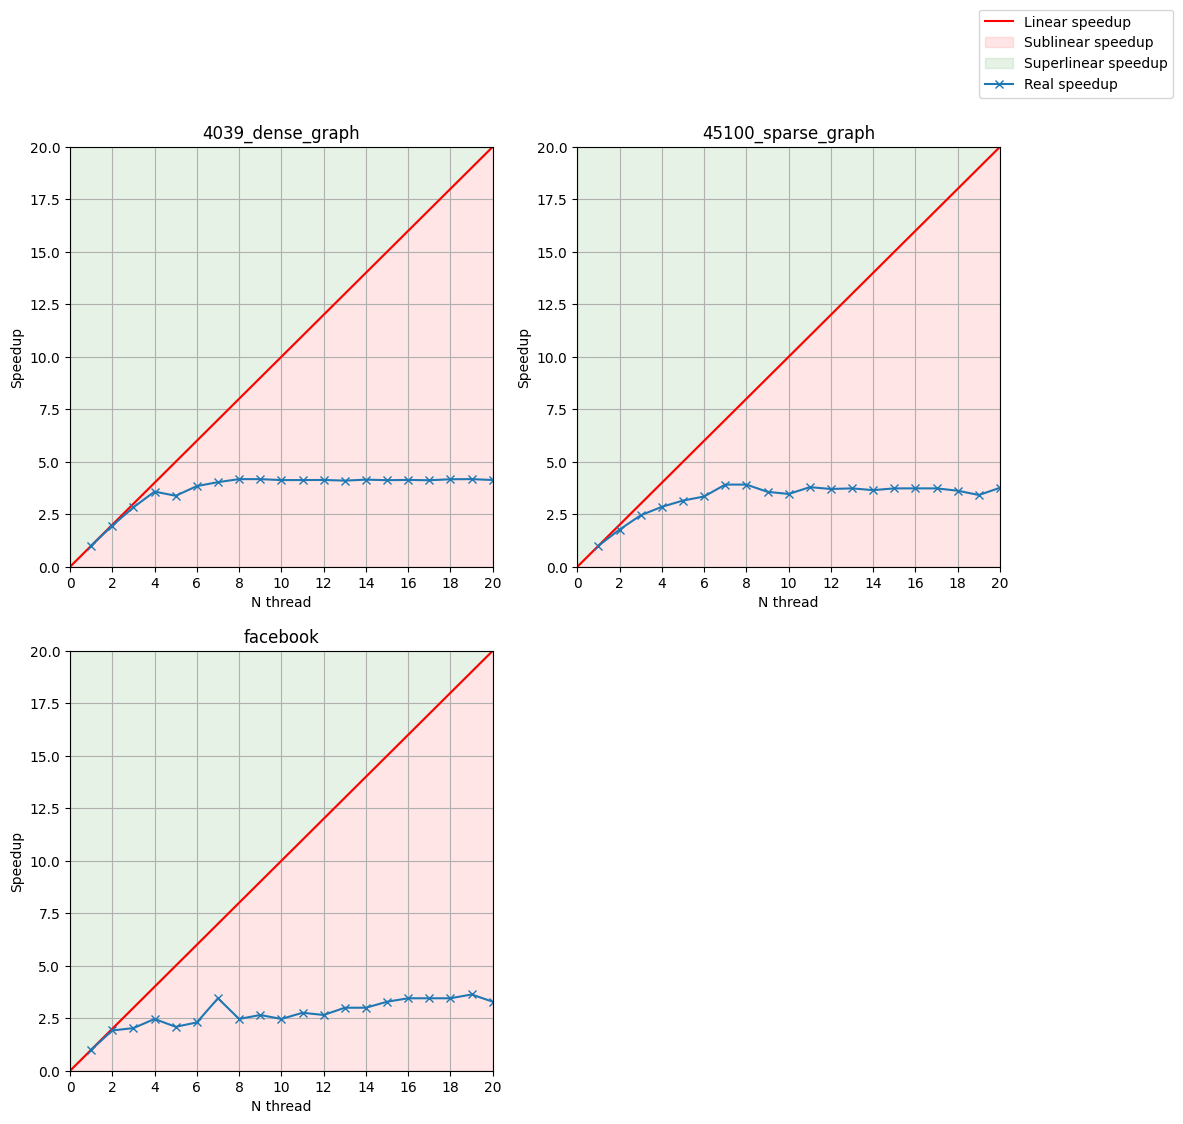

In [44]:
def plot_(max_thread:int):

    fig,axs=plt.subplots(math.ceil(data.shape[0]/2),2,figsize=(12,math.ceil(data.shape[0]/2)*6))
    
    axs=[item for sublist in axs for item in sublist]
    
    for index,row in data.iterrows():
        
        axs[index].set_xlabel("N thread")
        axs[index].set_ylabel("Speedup")
        
        axs[index].set_xlim(0,max_thread)
        axs[index].set_ylim(0,max_thread)
        
        axs[index].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        
        axs[index].set_title(row["name"])
        
        line = mlines.Line2D([0, 1], [0, 1], color='red',label="Linear speedup")
        transform = axs[index].transAxes
        line.set_transform(transform)
        axs[index].add_line(line)
        
        axs[index].fill_between([x for x in range(0,max_thread+1)],
                                [x for x in range(0,max_thread+1)],
                                alpha=0.1,color="red",label="Sublinear speedup")
        
        axs[index].fill_between([x for x in range(0,max_thread+1)],
                                [x for x in range(0,max_thread+1)],
                                max_thread, alpha=0.1,color="green", label="Superlinear speedup")
        
        axs[index].plot([x for x in range(1,max_thread+1)],
                           [row["1_time"]/row[str(x)+"_time"] for x in range(1,max_thread+1)],
                           '-x',
                           label="Real speedup")
        
        axs[index].grid()
        
        handles, labels = axs[index].get_legend_handles_labels()
    
    fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.05, 1))
    
    for index in range(data.shape[0],len(axs)):
        axs[index].remove()

plot_(20)